<a href="https://colab.research.google.com/github/projects-with-sakshi/Sweet_dishes_detector/blob/main/Testing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Connect to gooogle drive

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading Model

In [6]:
cnn=tf.keras.models.load_model('/content/trainedmodel.h5')

# Visualization and Performing Prediction on Single Image

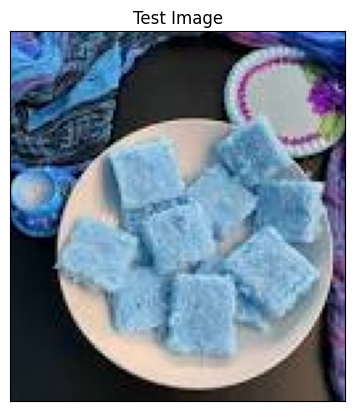

In [8]:
import cv2
image_path = "/content/drive/MyDrive/Sweet_dishes dataset/Test/coconut barfi/coconut barfi_18.jpg"
img =cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr =np.array([input_arr])   # converting single image to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 452ms/step


In [10]:
print(predictions[0])
print(max(predictions[0]))

[2.3420036e-35 1.7576235e-27 3.3944905e-28 3.2440201e-26 8.4308764e-15
 1.0000000e+00 3.3970288e-21 9.1509527e-18 4.0312767e-26]
1.0


In [11]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Sweet_dishes dataset/Test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=7,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

Found 63 files belonging to 9 classes.


In [12]:
test_set.class_names

['BaluShahi',
 'Gulabjamun',
 'Jalebi',
 'Rajbhog',
 'Ras malai',
 'coconut barfi',
 'kaju katli',
 'kalakand',
 'laddo']

In [13]:
result_index=np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

5


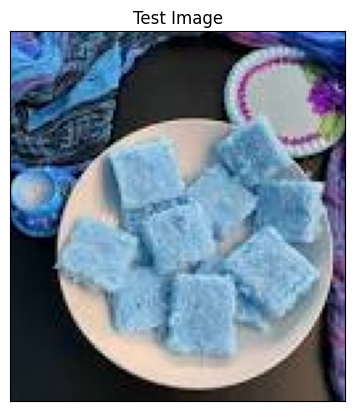

In [14]:
# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
# single ptediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a coconut barfi
